In [2]:
import matplotlib.pyplot as plt

Our model:
$x_{n+1}=\gamma (1-x_n)x_n$<br>
$x_n$ - percentage of maximal population over time.

In [3]:
def pop_over_time(pop_percent, gamma, max_year):
    year = 0
    while year < max_year:
        yield pop_percent
        pop_percent *= gamma*(1-pop_percent)
        year += 1

In [4]:
def plot_population(init_percent, gamma, max_year):
    years = list(range(max_year))
    pop_percent = list(pop_over_time(init_percent, gamma, max_year))
    
    plt.plot(years, pop_percent, label=f'$\gamma$={gamma:.1f}')
    

Checking for different values of $\gamma$:

In [5]:
import numpy as np

<IPython.core.display.Javascript object>


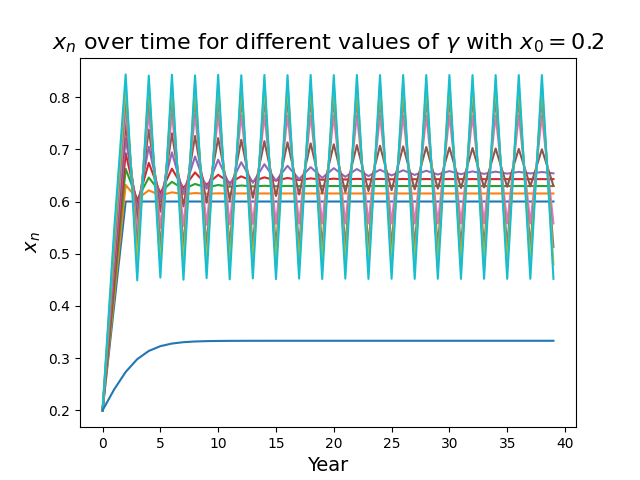

Text(0.5, 1.0, '$x_n$ over time for different values of $\\gamma$ with $x_0=0.2$')

In [6]:
%matplotlib notebook

max_year = 40
for gamma in np.arange(2.5, 3.5, 0.1):
    plot_population(0.2, gamma, max_year)

plt.xlabel('Year', fontsize=14)
plt.ylabel('$x_n$', fontsize=14)
plt.title('$x_n$ over time for different values of $\gamma$ with $x_0=0.2$',
         fontsize=16)

When will things stabilize? 
__Answer__: when $x_n=x_{n+1}$, and this happens when:

$x_n=\gamma x_n (1-x_n)$
<br>
$x_n=\gamma x_n - \gamma x_{n}^2$ 
<br>
$1 = \gamma - \gamma x_{n}$ 
<br>
$-1/\gamma = -1 + x_{n}$ 
<br>
$1 - 1/\gamma = x_{n}$

$x_n=\gamma x_n (1-x_n)\Rightarrow x_n^{stable}=1-1/\gamma$

###### Exercise - create a function which, using binary search, can find another function's root given that function, an x with a positive value, a point with a negative value, and the required precision.

This method is known as the bisection method, because we're bisecting the relevant area where the root may be.

In [7]:
plot_population(0.2, 1.5, 40)
print(1 - 1/1.5)

0.33333333333333337


In [13]:
def population(pop_percent, gamma, max_year):
    year = 0
    while year < max_year:
        pop_percent *= gamma*(1-pop_percent)
        year += 1
    return pop_percent


<IPython.core.display.Javascript object>


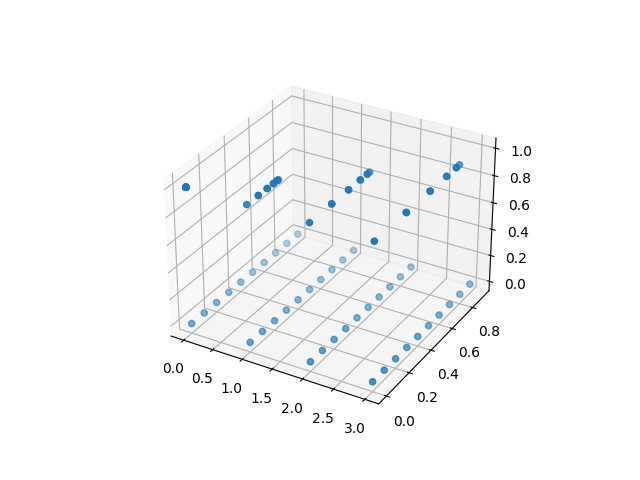

In [17]:
x = []
y = []
z = []
for gamma in np.arange(0, 4, 1):
    for pop_percent in np.arange(0, 1, 0.1):
        for year in np.arange(0, 2, 1):
            y.append(population(pop_percent, gamma, year))
            x.append(gamma)
            z.append(year)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)